Name: **Shahid Ali Khowaja**

Student ID: **23034289**

In [1]:
#!pip install --upgrade --force-reinstall pandas==2.2.2 numpy==1.26.4 tensorflow==2.18.0 numba==0.60.0

In [2]:
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


In [3]:
# import libaraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.optimizers import Adam
import warnings
from tensorflow.keras.callbacks import EarlyStopping
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


In [4]:
# Suppress all warning messages during execution to keep the output clean
# Useful when using libraries (like statsmodels or sklearn) that raise harmless warnings
warnings.filterwarnings("ignore")

In [5]:
# Import the drive module from google.colab to enable access to Google Drive
from google.colab import drive

# Mount your Google Drive to the '/content/drive' directory
# This allows you to read from and write to files stored in your Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# import data from My Drive
df_nvidia = pd.read_csv("/content/drive/MyDrive/NVIDIA_STOCK.csv")

In [7]:
# Display the dataframe
df_nvidia.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000


In [8]:
# display information
df_nvidia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1699 non-null   object
 1   Adj Close  1698 non-null   object
 2   Close      1698 non-null   object
 3   High       1698 non-null   object
 4   Low        1698 non-null   object
 5   Open       1698 non-null   object
 6   Volume     1698 non-null   object
dtypes: object(7)
memory usage: 93.0+ KB


In [9]:
# Data Cleaning
# Remove unwanted rows
df_nvidia = df_nvidia.iloc[2:]
# Remove rows with missing values
df_nvidia = df_nvidia.dropna()

In [10]:
# Convert object into float
df_nvidia[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']] = df_nvidia[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].astype(float)

In [11]:
# Handle missing values
df_nvidia.ffill(inplace=True)

In [12]:
# Convert date column to datetime
df_nvidia.rename(columns={'Price': 'Date'}, inplace=True)
df_nvidia['Date'] = pd.to_datetime(df_nvidia['Date'])
df_nvidia = df_nvidia.sort_values(by="Date").reset_index(drop=True)

In [13]:
# Display summary
df_nvidia.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2018-01-02,4.929880,4.98375,4.98750,4.86250,4.89450,355616000.0
1,2018-01-03,5.254335,5.31175,5.34250,5.09375,5.10250,914704000.0
2,2018-01-04,5.282033,5.33975,5.45125,5.31725,5.39400,583268000.0
3,2018-01-05,5.326794,5.38500,5.42275,5.27700,5.35475,580124000.0
4,2018-01-08,5.490012,5.55000,5.62500,5.46450,5.51000,881216000.0


In [14]:
# display information
df_nvidia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1697 non-null   datetime64[ns]
 1   Adj Close  1697 non-null   float64       
 2   Close      1697 non-null   float64       
 3   High       1697 non-null   float64       
 4   Low        1697 non-null   float64       
 5   Open       1697 non-null   float64       
 6   Volume     1697 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 92.9 KB


In [15]:
# Missing values
df_nvidia.isna().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [16]:
# Duplicated values
df_nvidia.duplicated().sum()

0

In [17]:
# Summary statistics
df_nvidia.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,1697,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1.697000e+03
mean,2021-05-16 04:49:21.461402368,24.797593,24.828411,25.295239,24.315422,24.823341,4.716865e+08
min,2018-01-02 00:00:00,3.151430,3.177000,3.249500,3.111500,3.162250,9.788400e+07
25%,2019-09-10 00:00:00,6.113620,6.161750,6.250000,6.064250,6.166250,3.278440e+08
50%,2021-05-17 00:00:00,13.985092,14.015750,14.243500,13.750000,14.033750,4.349650e+08
75%,2023-01-23 00:00:00,27.088902,27.104000,27.496000,26.613001,27.077999,5.708320e+08
max,2024-09-30 00:00:00,135.559067,135.580002,140.759995,132.419998,139.800003,2.511528e+09
std,NaN,29.221442,29.216014,29.811740,28.570804,29.240504,2.093254e+08


In [18]:
# display correlation
df_nvidia.corr()

,Date,Adj Close,Close,High,Low,Open,Volume
Date,1.000000,0.766104,0.765909,0.765275,0.766219,0.765174,-0.105869
Adj Close,0.766104,1.000000,1.000000,0.999662,0.999763,0.999329,-0.113866
Close,0.765909,1.000000,1.000000,0.999662,0.999763,0.999330,-0.113864
High,0.765275,0.999662,0.999662,1.000000,0.999673,0.999780,-0.109508
Low,0.766219,0.999763,0.999763,0.999673,1.000000,0.999668,-0.117262
Open,0.765174,0.999329,0.999330,0.999780,0.999668,1.000000,-0.112821
Volume,-0.105869,-0.113866,-0.113864,-0.109508,-0.117262,-0.112821,1.000000


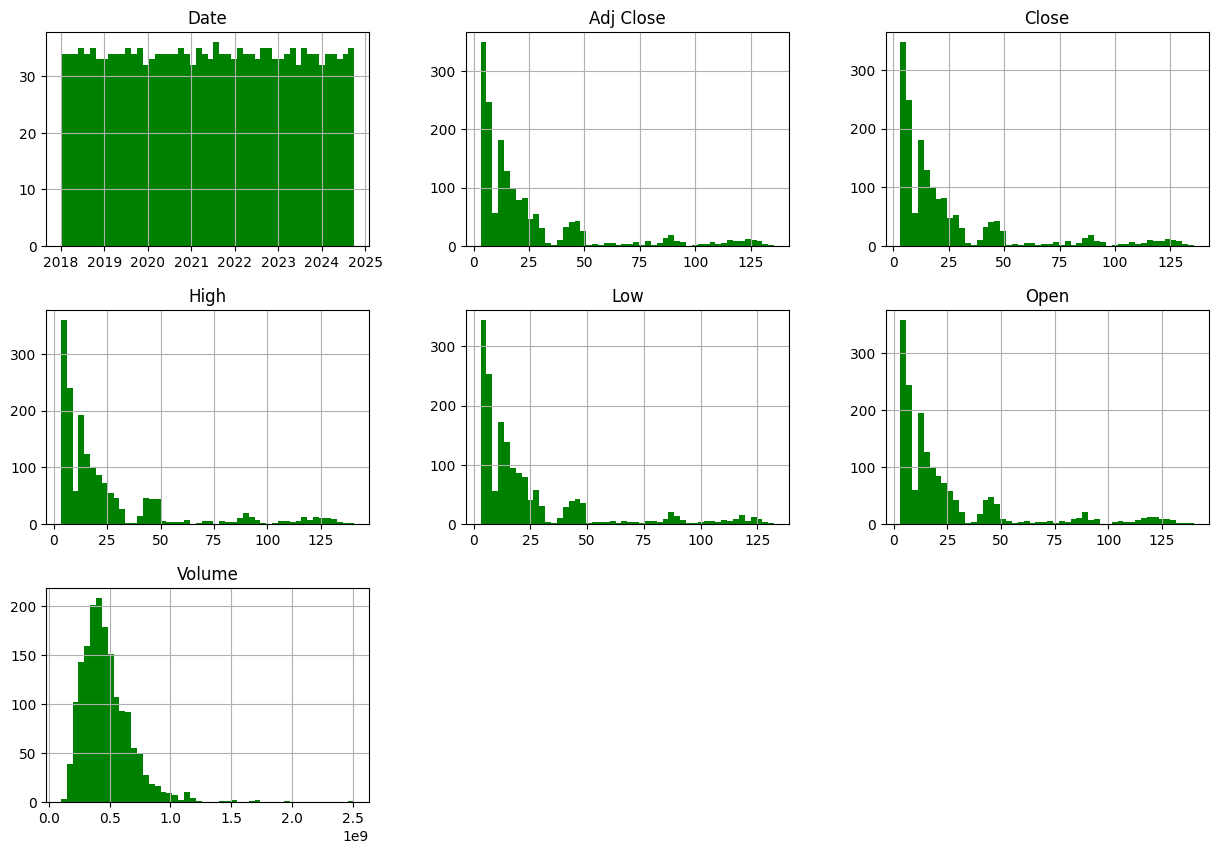

In [19]:
# Create histograms for all numerical columns in the DataFrame
# bins=50 sets the number of bins (bar intervals)
df_nvidia.hist(bins=50, color="green", figsize=(15,10))
plt.savefig('nvidia-histrogram.png')
plt.show()

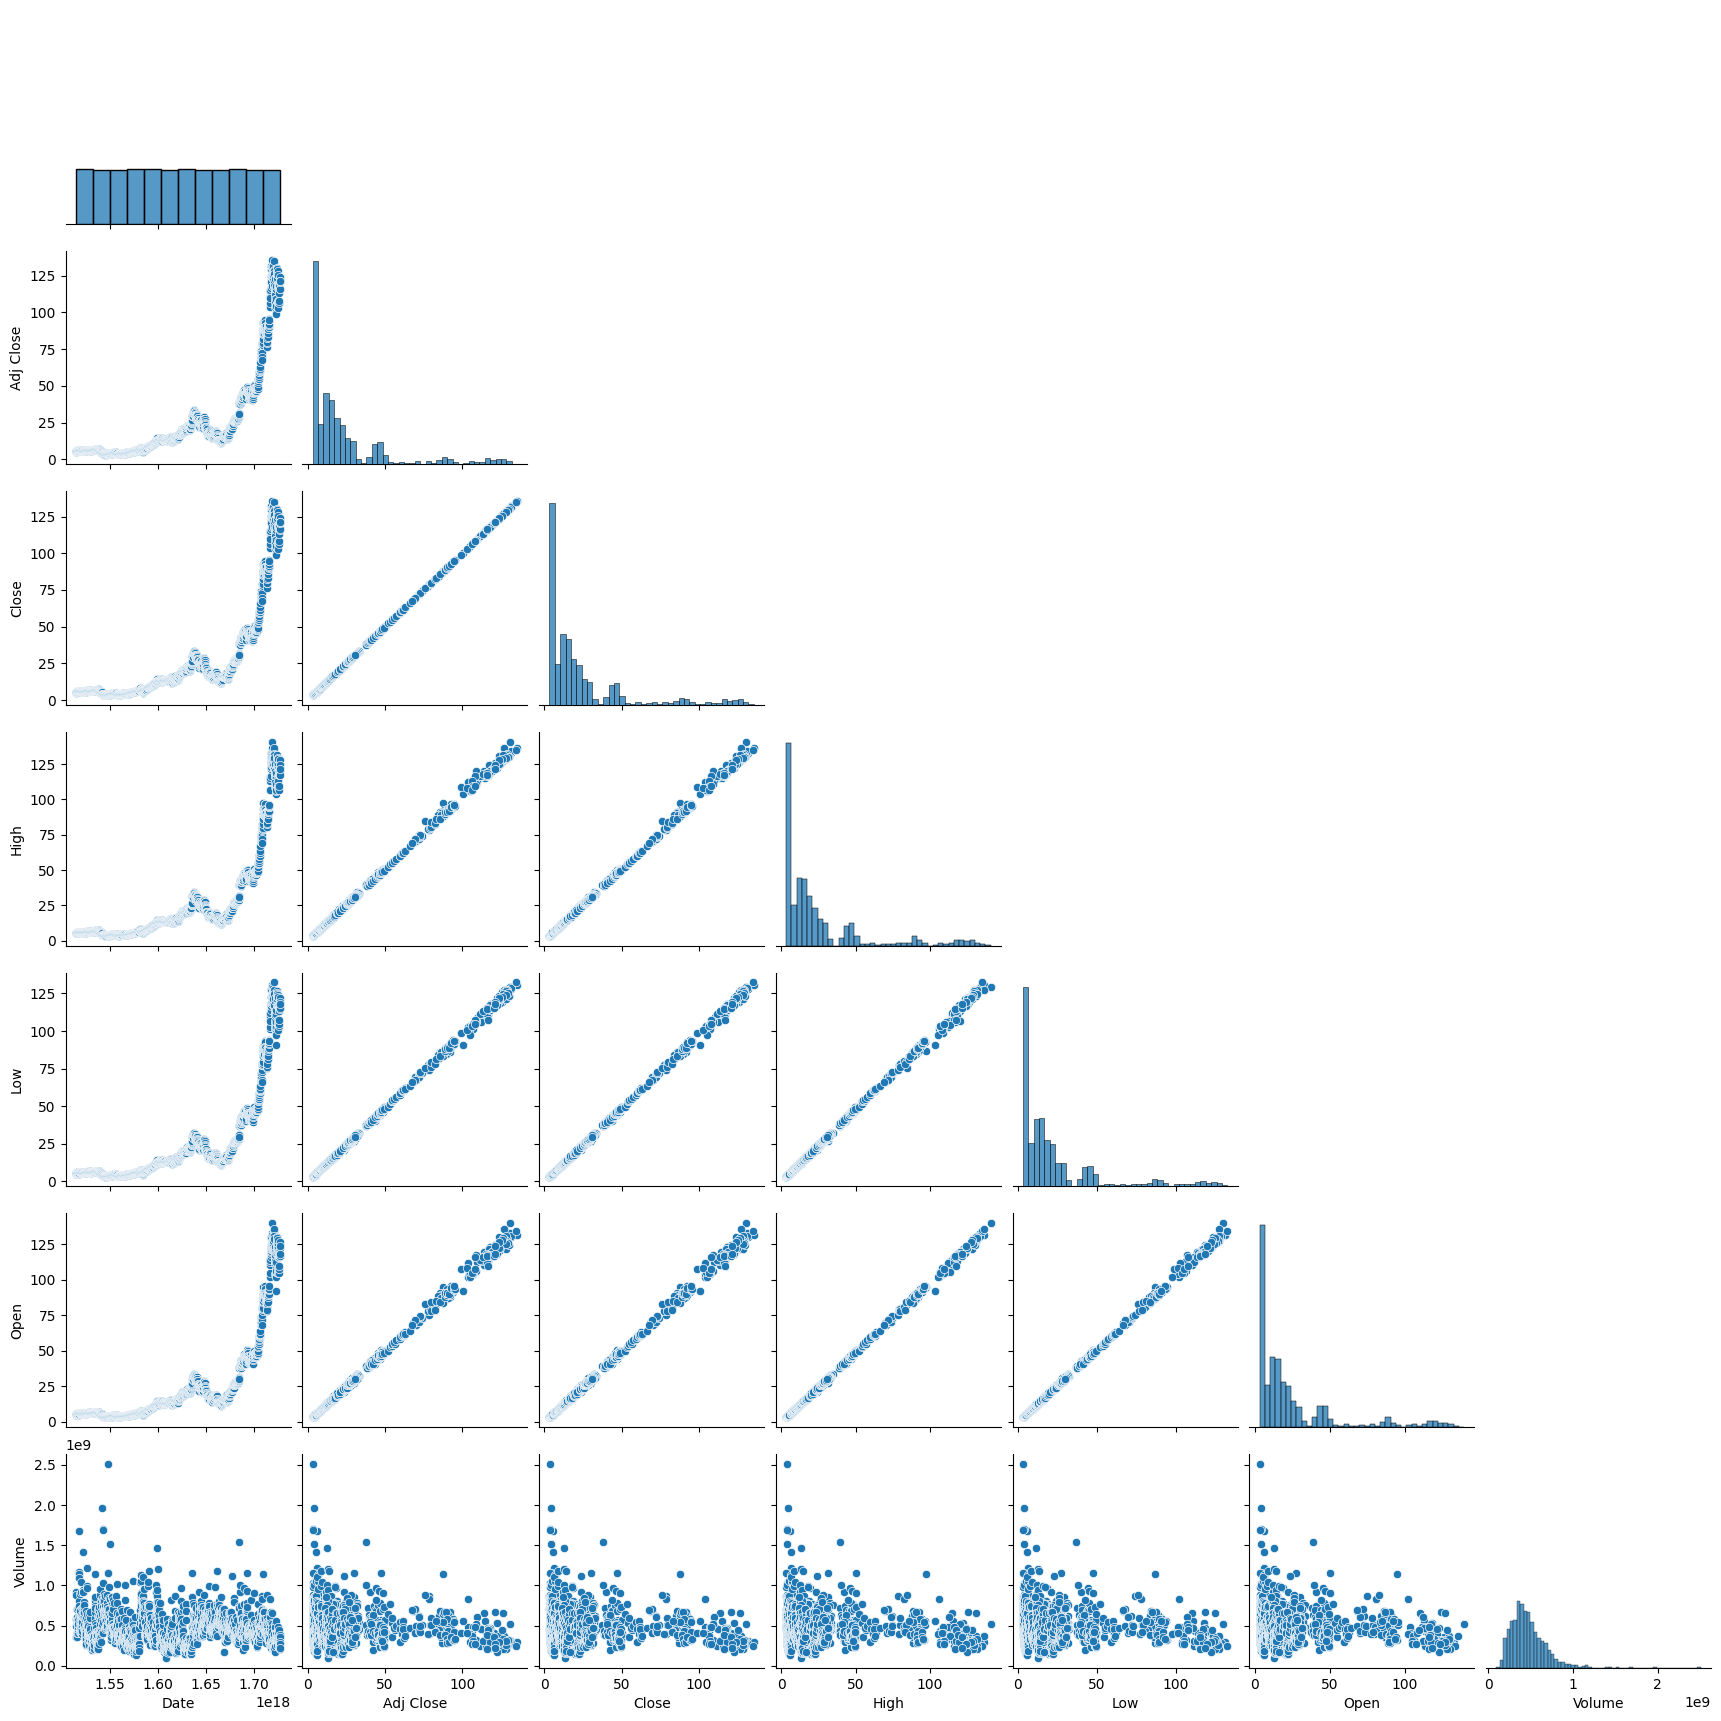

In [20]:
# Looking at some real data, where we don't know the number of clusters already
for col in df_nvidia.columns:
    df_nvidia[col] = pd.to_numeric(df_nvidia[col])

sns.pairplot(df_nvidia, corner=True)
plt.savefig('nvidia-cluster.png')
plt.show()

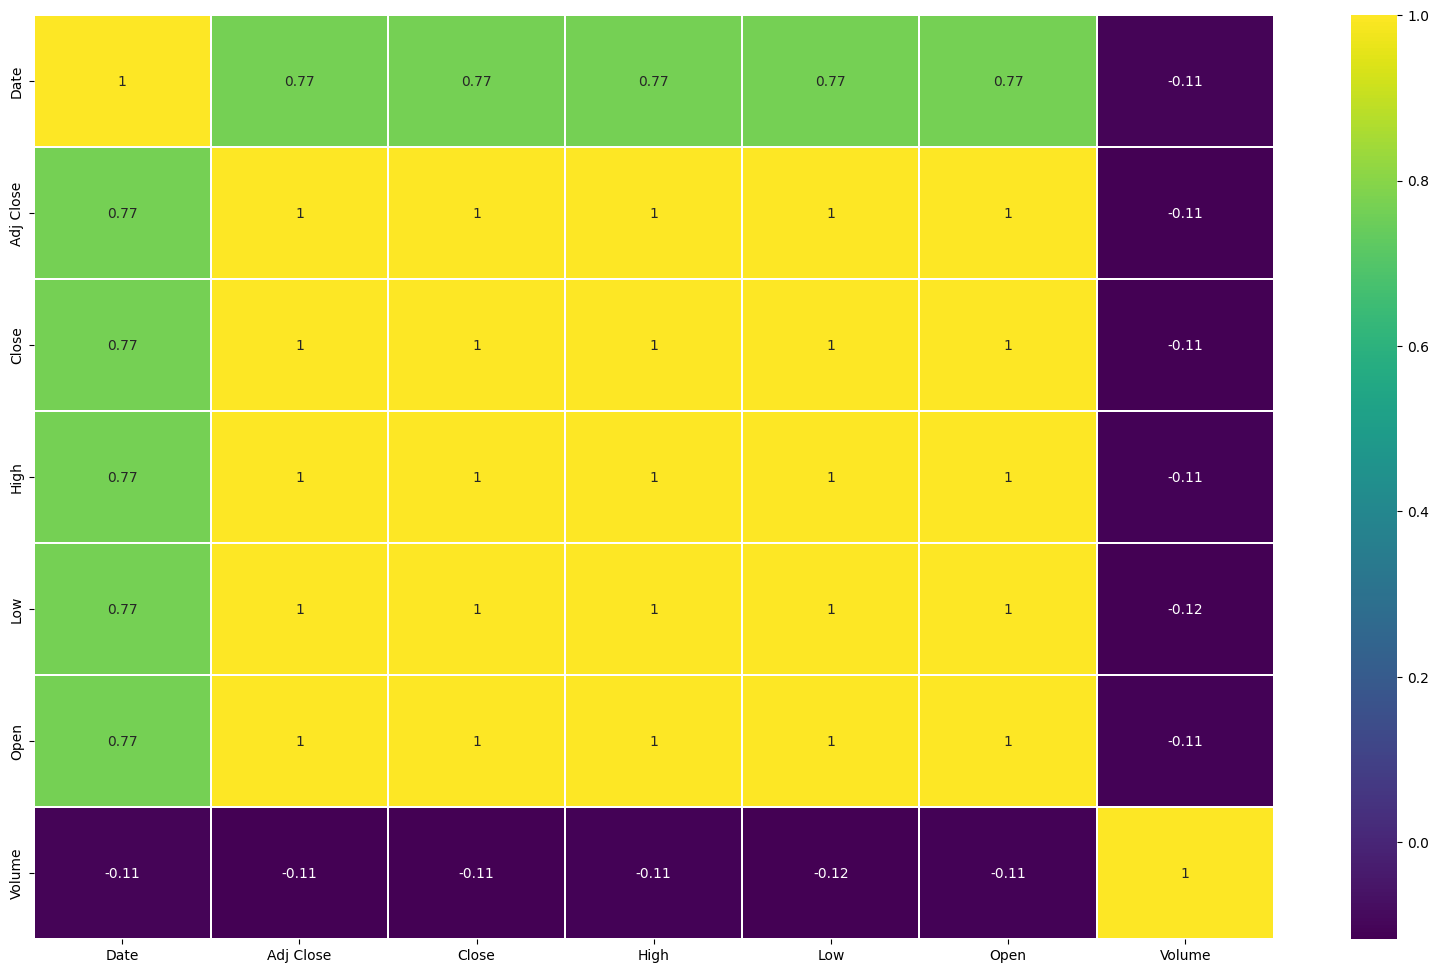

In [21]:
# Show correlation
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.heatmap(df_nvidia.corr(), cmap='viridis', cbar=True, annot=True, linewidths=0.2,ax=ax)
# save image
plt.savefig('nvidia-corr.png')
plt.show()

In [22]:
# Check if the DataFrame index is named "Date"
# This is useful to ensure compatibility when merging, plotting, or resampling
if df_nvidia.index.name == "Date":
    # If so, reset the index to move "Date" back into a regular column
    df_nvidia = df_nvidia.reset_index()

In [23]:
# Feature Engineering (Moving Averages and Volatility)

# Calculate the 50-day Simple Moving Average (SMA), which smooths the closing price by averaging it over the last 50 days to identify short-term trends.
df_nvidia['SMA_50'] = df_nvidia['Close'].rolling(window=50).mean()

# Calculate the 200-day Simple Moving Average (SMA), which smooths the closing price over the last 200 days to identify long-term trends.
df_nvidia['SMA_200'] = df_nvidia['Close'].rolling(window=200).mean()

# Calculate the 50-day rolling standard deviation (Volatility), which measures the dispersion of closing prices over the last 50 days, indicating market volatility.
df_nvidia['Volatility'] = df_nvidia['Close'].rolling(window=50).std()

df_nvidia.dropna(inplace=True)

In [24]:
# Display the dataframe
df_nvidia.head()

,Date,Adj Close,Close,High,Low,Open,Volume,SMA_50,SMA_200,Volatility
199,1539648000000000000,6.090191,6.14575,6.15700,5.94850,5.99825,408712000.0,6.656860,6.178069,0.321654
200,1539734400000000000,6.021566,6.07650,6.24700,6.02700,6.20850,329668000.0,6.649915,6.183533,0.330420
201,1539820800000000000,5.934114,5.98825,6.18525,5.92725,6.14650,524020000.0,6.640470,6.186915,0.342474
202,1539907200000000000,5.677456,5.72925,6.06375,5.69250,6.04400,613608000.0,6.626825,6.188863,0.364656
203,1540166400000000000,5.728243,5.78050,5.88300,5.67675,5.78200,368844000.0,6.615040,6.190840,0.382232


In [25]:
# Convert "Date" to datetime format
df_nvidia["Date"] = pd.to_datetime(df_nvidia["Date"], errors='coerce')

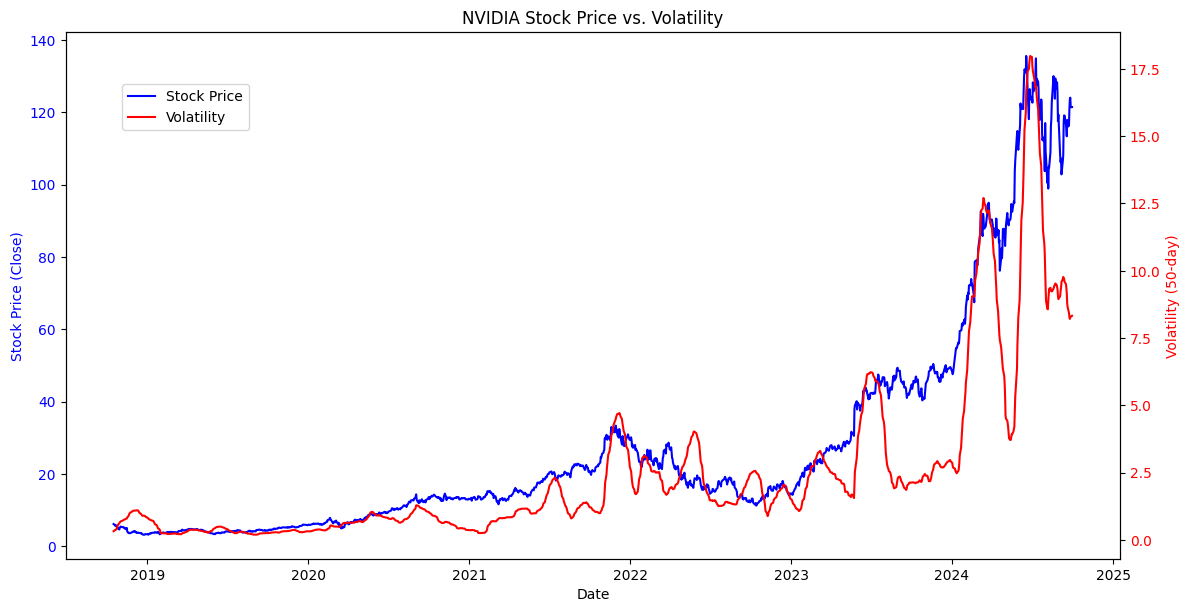

In [26]:
# Plot stock price and volatility
# Create a figure and axis for the primary y-axis (stock price)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stock price
# Set label for x-axis
ax1.set_xlabel("Date")

# Set label and color for left y-axis (stock price)
ax1.set_ylabel("Stock Price (Close)", color="blue")

# Plot stock closing prices on the left y-axis
line1, = ax1.plot(df_nvidia["Date"], df_nvidia["Close"], label="Stock Price", color="blue")

# Color the y-axis tick labels to match the line color
ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis on the right for volatility
ax2 = ax1.twinx()

# Set label and color for right y-axis (volatility)
ax2.set_ylabel("Volatility (50-day)", color="red")

# Plot 50-day rolling volatility on the right y-axis
line2, = ax2.plot(df_nvidia["Date"], df_nvidia["Volatility"], label="Volatility", color="red")

# Color the y-axis tick labels to match the line color
ax2.tick_params(axis="y", labelcolor="red")

# Combine both plots lines into a single legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Adjust layout to prevent label overlap
fig.tight_layout()

# Add a title to the entire figure
plt.title("NVIDIA Stock Price vs. Volatility")

# Save the plot as a PNG file
plt.savefig('nvidia-stock-price-volatility.png')

# Display the plot
plt.show()

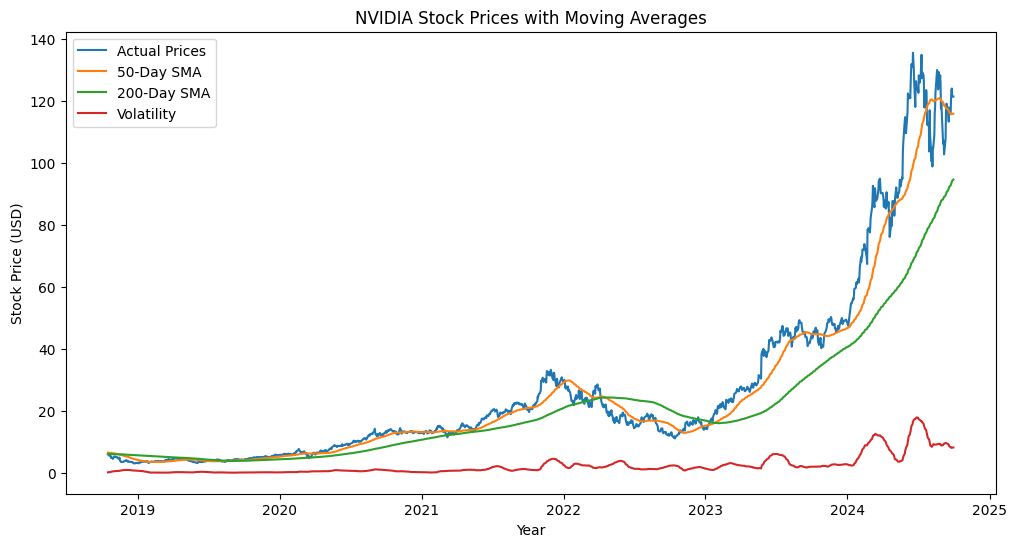

In [27]:
# Create a new figure with specified size
plt.figure(figsize=(12, 6))

# Create a new figure with specified size
plt.plot(df_nvidia["Date"], df_nvidia["Close"], label="Actual Prices")

# Plot the 50-day Simple Moving Average
plt.plot(df_nvidia["Date"], df_nvidia["SMA_50"], label="50-Day SMA")

# Plot the 200-day Simple Moving Average
plt.plot(df_nvidia["Date"], df_nvidia["SMA_200"], label="200-Day SMA")

# Plot the 50-day rolling volatility
plt.plot(df_nvidia["Date"], df_nvidia["Volatility"], label="Volatility")

# Set the title of the plot
plt.title("NVIDIA Stock Prices with Moving Averages")

# Label the x-axis
plt.xlabel("Year")

# Label the y-axis
plt.ylabel("Stock Price (USD)")

# Add a legend to show which line corresponds to each label
plt.legend()

# Save the plot as an image file
plt.savefig('nvidia-stock-price-moving-average.png')

# Display the plot on screen
plt.show()

In [28]:
# Define features and target
features = ['Adj Close', 'High', 'Low', 'Open', 'Volume', 'SMA_50', 'SMA_200', 'Volatility']
target = 'Close'

In [29]:
# Scale data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [30]:
# Define a function to create lagged sequences for time series prediction
def create_sequences(X, y, seq_len):

    # Initialize empty lists to hold input sequences and corresponding targets
    Xs, ys = [], []

    # Loop through the dataset starting from index 'seq_len' to the end
    for i in range(seq_len, len(X)):
        # Append a window of 'seq_len' previous time steps from X as one input sequence
        Xs.append(X[i - seq_len:i])
        # Append the corresponding y value (target) right after the sequence
        ys.append(y[i])
    # Convert lists to NumPy arrays and return
    return np.array(Xs), np.array(ys)

**LSTM DAILY PREDICTIONS**

In [31]:
# Scale the input features to a 0-1 range using MinMaxScaler
X_scaled = scaler_X.fit_transform(df_nvidia[features])

# Scale the target values (Close price) separately
y_scaled = scaler_y.fit_transform(df_nvidia[[target]])

# Set sequence length — use 60 previous days to predict the next day
sequence_length = 60

# Create sequences of 60 days of input and their corresponding target values
X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)

# Define training size as 80% of total sequences, preserving chronological order
train_size = int(0.8 * len(X_seq))

# Split the data into training and testing sets (no shuffling for time series)
X_train = X_seq[:train_size]
y_train = y_seq[:train_size]
X_test  = X_seq[train_size:]
y_test  = y_seq[train_size:]

# Define the LSTM model architecture
model = Sequential([
    # First LSTM layer with 128 units and return sequences for stacking
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3), # Dropout to reduce overfitting
    # Second LSTM layer with 64 units, outputting the last value only
    LSTM(64),
    Dropout(0.3), # Another dropout layer
    # Final dense layer to output one predicted value
    Dense(1)
])
# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Set up early stopping to halt training when loss stops improving
early_stopping = EarlyStopping(
    monitor='loss', # Monitor training loss (could be 'val_loss' too)
    patience=15,    # Stop after 15 epochs with no improvement
    min_delta=0.0001, # Minimum change to be considered an improvement
    restore_best_weights=True, # Keep the best weights before overfitting started
    verbose=1 # Print early stopping info
    )

# Train the model using training data, validate on test data
history_daily = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Generate scaled predictions on test data
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions to get actual price values
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Inverse transform true test values to compare with predictions
y_actual = scaler_y.inverse_transform(y_test)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 0.0135 - val_loss: 0.0405
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0017 - val_loss: 0.0089
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 9.9354e-04 - val_loss: 0.0039
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 7.2339e-04 - val_loss: 0.0041
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 5.7709e-04 - val_loss: 0.0034
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 6.5131e-04 - val_loss: 0.0033
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 5.2543e-04 - val_loss: 0.0035
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 4.6255e-04 - val_loss: 0.0032
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 4.4247e-04 - val_loss: 0.0034
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - loss: 4.4389e-04 - val_loss: 0.0033
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 3.5036e-04 - val_loss: 0.0030
Epoch 

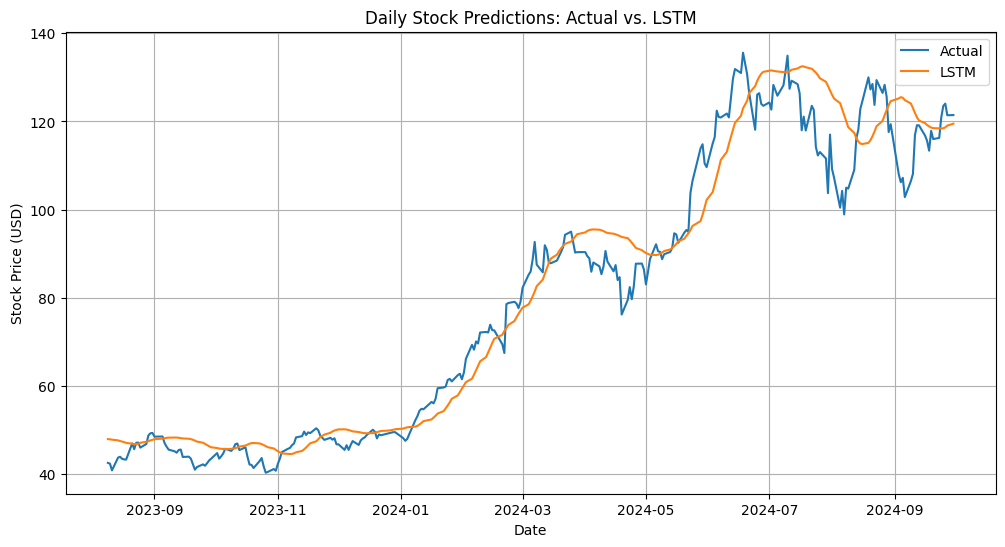

In [32]:
# Extract the corresponding dates for the test predictions,
# accounting for the sequence_length used in the LSTM
dates_daily = df_nvidia['Date'][train_size + sequence_length : len(df_nvidia)]

# Create a new figure with specified width and height
plt.figure(figsize=(12, 6))

# Plot actual stock prices (flattened to 1D for plotting)
plt.plot(dates_daily, y_actual.flatten(), label='Actual')

# Plot predicted stock prices from the LSTM model
plt.plot(dates_daily, y_pred.flatten(), label='LSTM')

# Set the plot title
plt.title("Daily Stock Predictions: Actual vs. LSTM")

# Label the x-axis
plt.xlabel("Date")

# Label the y-axis
plt.ylabel("Stock Price (USD)")

# Display a legend, enable grid for better visual guidance, Save the plot as a PNG file, Display the plot
plt.legend()
plt.grid(True)
plt.savefig('nvidia-lstm-daily-predication.png')
plt.show()

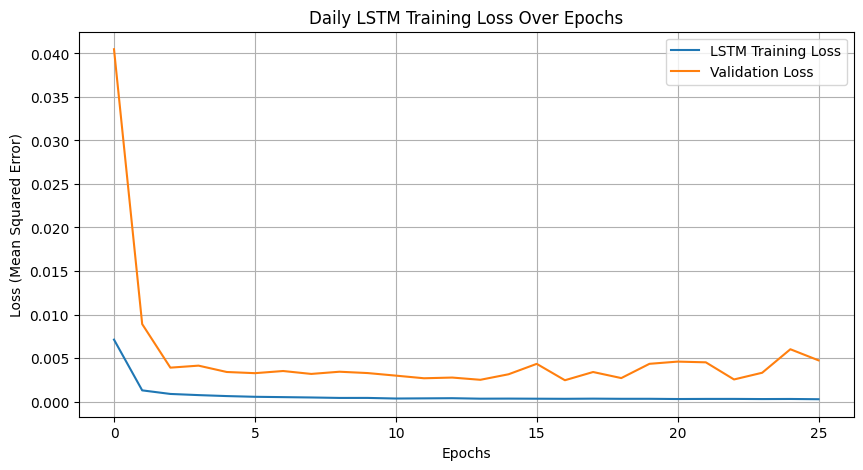

In [33]:
# Create a new figure with specified width and height
plt.figure(figsize=(10, 5))

# Plot the training loss recorded during model training
plt.plot(history_daily.history['loss'], label="LSTM Training Loss")
# Plot the validation loss to monitor generalization performance
plt.plot(history_daily.history['val_loss'], label='Validation Loss')

# Set label for the x-axis (number of epochs)
plt.xlabel("Epochs")
# Set label for the y-axis (loss value)
plt.ylabel("Loss (Mean Squared Error)")
# Set the title of the plot
plt.title("Daily LSTM Training Loss Over Epochs")

# Display a legend, enable grid for better visual guidance, Save the plot as a PNG file, Display the plot
plt.legend()
plt.grid(True)
plt.savefig('nvidia-lstm-daily-loss-epochs.png')
plt.show()

**LSTM WEEKLY PREDICTIONS**

In [34]:
# Resample the data to weekly frequency using the last trading day of each week
df_weekly = df_nvidia.set_index('Date').resample('W').last().reset_index()

# Scale weekly input features using the same MinMaxScaler approach
X_week_scaled = scaler_X.fit_transform(df_weekly[features])
# Scale the weekly target variable (Close price)
y_week_scaled = scaler_y.fit_transform(df_weekly[[target]])

# Create sequences: use 4 weeks of data to predict the next week's price
seq_length_week = 4
X_week_seq, y_week_seq = create_sequences(X_week_scaled, y_week_scaled, seq_length_week)

# Define training size (80%) without shuffling to preserve sequence order
train_size_week = int(0.8 * len(X_week_seq))

# Split into training and testing datasets
X_week_train = X_week_seq[:train_size_week]
y_week_train = y_week_seq[:train_size_week]
X_week_test  = X_week_seq[train_size_week:]
y_week_test  = y_week_seq[train_size_week:]

# Build the LSTM model for weekly data
model_week = Sequential([
    # First LSTM layer with 128 units and output sequences for the next layer
    LSTM(128, return_sequences=True, input_shape=(X_week_train.shape[1], X_week_train.shape[2])),
    Dropout(0.3), # Dropout to reduce overfitting
    LSTM(64), # Second LSTM layer with 64 units, outputs final value
    Dropout(0.3), # More dropout for regularization
    Dense(1) # Output layer to predict a single value
])
# Compile the model with Adam optimizer and MSE loss function
model_week.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Set up early stopping to prevent overfitting
early_stopping_week = EarlyStopping(
    monitor='loss', # Monitor training loss
    patience=10,    # Stop after 10 epochs with no improvement
    min_delta=0.0001, # Minimum loss change to count as improvement
    restore_best_weights=True, # Restore best model weights
    verbose=1 # Print stopping messages
    )

# Train the weekly LSTM model
history_week = model_week.fit(X_week_train, y_week_train, epochs=100, batch_size=32, validation_data=(X_week_test, y_week_test), callbacks=[early_stopping_week], verbose=1)

# Predict stock prices using the trained model
y_week_pred_scaled = model_week.predict(X_week_test)
# Inverse transform predictions to get actual price values
y_week_pred = scaler_y.inverse_transform(y_week_pred_scaled)
# Inverse transform true test values for comparison
y_week_actual = scaler_y.inverse_transform(y_week_test)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0137 - val_loss: 0.3961
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - val_loss: 0.3331
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - val_loss: 0.2786
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0064 - val_loss: 0.2290
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0043 - val_loss: 0.1858
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0042 - val_loss: 0.1496
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030 - val_loss: 0.1203
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0025 - val_loss: 0.1001
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026 - val_loss: 0.0833
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0021 - val_loss: 0.0718
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0019 - val_loss: 0.0623
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0018 - val_lo

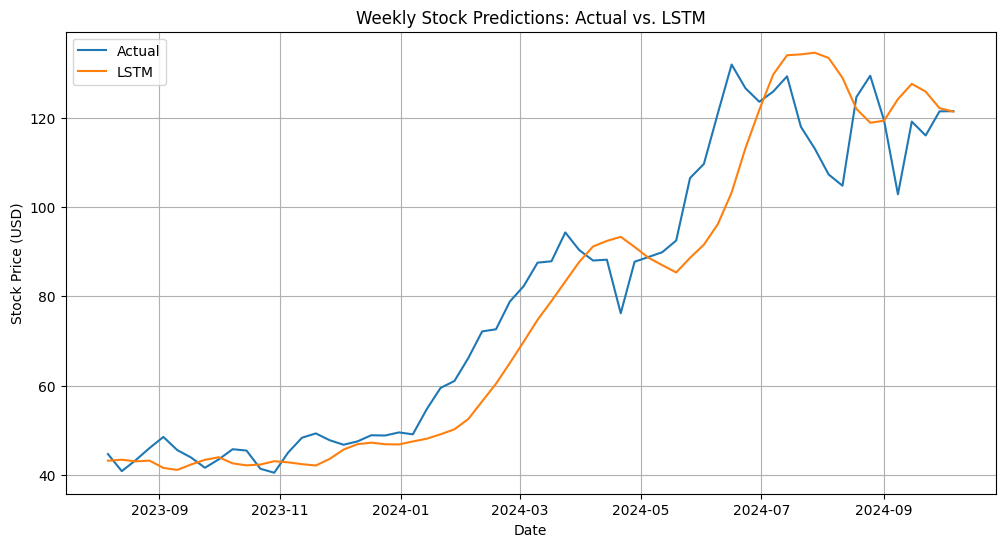

In [35]:
# Extract the correct range of weekly dates to align with prediction output
dates_weekly = df_weekly['Date'][train_size_week + seq_length_week : len(df_weekly)]

# Create a new figure with specified dimensions
plt.figure(figsize=(12, 6))

# Plot the actual weekly stock prices (target values)
plt.plot(dates_weekly, y_week_actual, label='Actual')

# Plot the LSTM model's predicted weekly stock prices
plt.plot(dates_weekly, y_week_pred, label='LSTM')

# Add a title to the plot
plt.title("Weekly Stock Predictions: Actual vs. LSTM")

# Label the x-axis as Date
plt.xlabel("Date")

# Label the y-axis as Stock Price
plt.ylabel("Stock Price (USD)")

# Display a legend, enable grid for better visual guidance, Save the plot as a PNG file, Display the plot
plt.legend()
plt.grid(True)
plt.savefig('nvidia-lstm-weekly-predication.png')
plt.show()

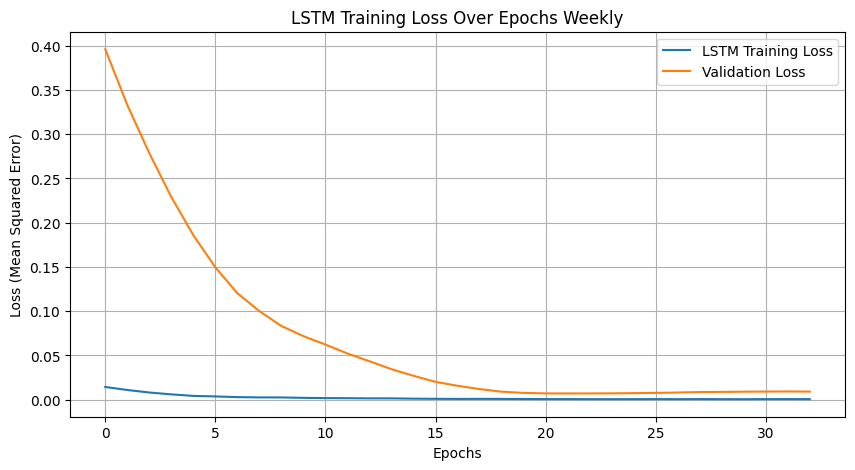

In [36]:
# Create a new figure with a specified size for the weekly training loss plot
plt.figure(figsize=(10, 5))
# Plot the training loss values over each epoch from model history
plt.plot(history_week.history['loss'], label="LSTM Training Loss")
# Plot the validation loss values to observe model generalization
plt.plot(history_week.history['val_loss'], label='Validation Loss')

# Label the x-axis to indicate the number of epochs
plt.xlabel("Epochs")
# Label the y-axis to indicate the loss value (Mean Squared Error)
plt.ylabel("Loss (Mean Squared Error)")
# Add a title specific to the weekly LSTM model training
plt.title("LSTM Training Loss Over Epochs Weekly")

# Display a legend, enable grid for better visual guidance, Save the plot as a PNG file, Display the plot
plt.legend()
plt.grid(True)
plt.savefig('nvidia-lstm-weekly-loss-epochs.png')
plt.show()

In [37]:
# Reshape the 3D input (used for LSTM) to 2D format (samples, features) for Linear Regression
X_train_lr = X_train.reshape(X_train.shape[0], -1)  # Flatten training data
X_test_lr = X_test.reshape(X_test.shape[0], -1) # Flatten test data

# Initialize and train the Linear Regression model on the flattened training data
linear_model = LinearRegression()
linear_model.fit(X_train_lr, y_train)

# Use the trained model to predict stock prices on the test set
y_pred_lr = linear_model.predict(X_test_lr)

# Inverse transform the predicted values to return them to original price scale
y_pred_lr_inv = scaler_y.inverse_transform(y_pred_lr)

# Inverse transform the actual test values for comparison
y_actual_lr_inv = scaler_y.inverse_transform(y_test)

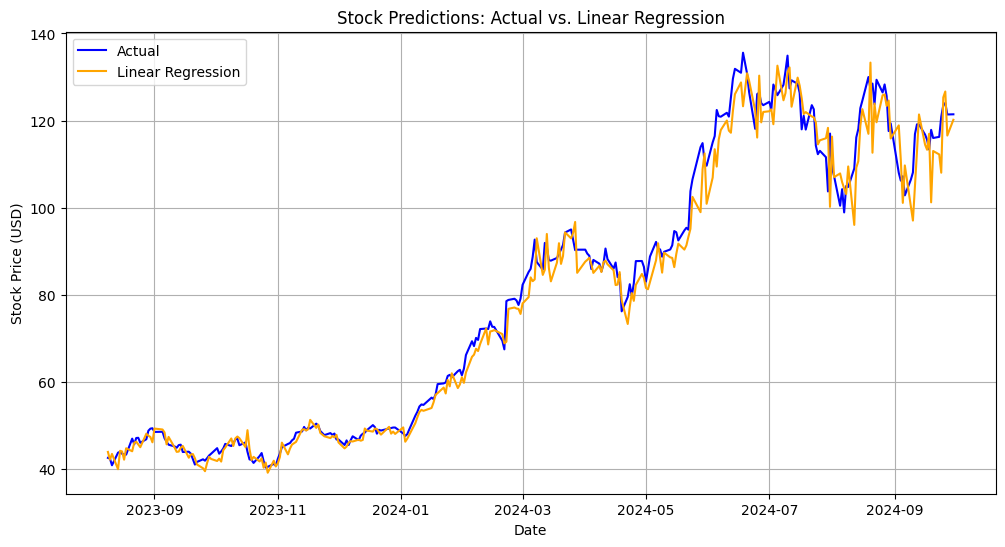

In [38]:
# Select the date range that aligns with the test set predictions (after sequence window)
dates_daily = df_nvidia['Date'][train_size + sequence_length : len(df_nvidia)]

# Create a new plot with specified figure size
plt.figure(figsize=(12, 6))

# Plot the actual stock prices (true values)
plt.plot(dates_daily, y_actual.flatten(), label='Actual', color='blue')

# Plot the predicted stock prices from Linear Regression
plt.plot(dates_daily, y_pred_lr_inv.flatten(), label='Linear Regression', color='orange')

# Add a title to the plot
plt.title("Stock Predictions: Actual vs. Linear Regression")

# Label the x-axis with 'Date'
plt.xlabel("Date")

# Label the y-axis with 'Stock Price (USD)'
plt.ylabel("Stock Price (USD)")

# Display a legend, enable grid for better visual guidance, Save the plot as a PNG file, Display the plot
plt.legend()
plt.grid(True)
plt.savefig('nvidia-linear-regression-predication.png')
plt.show()

In [39]:
# Flatten the 3D LSTM input data into 2D format (samples, features) for Random Forest
X_train_rf = X_train.reshape(X_train.shape[0], -1) # Flatten training features
X_test_rf = X_test.reshape(X_test.shape[0], -1) # Flatten test features

# Initialize the Random Forest Regressor with 100 trees and a fixed random seed for reproducibility
random_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the flattened training data
random_model.fit(X_train_rf, y_train)

# Predict the stock prices on the test set
y_pred_rf = random_model.predict(X_test_rf)

# Reshape predictions and inverse transform them to original stock price scale
y_pred_rf_inv = scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1))

# Inverse transform the actual test values for accurate comparison
y_actual_rf_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))

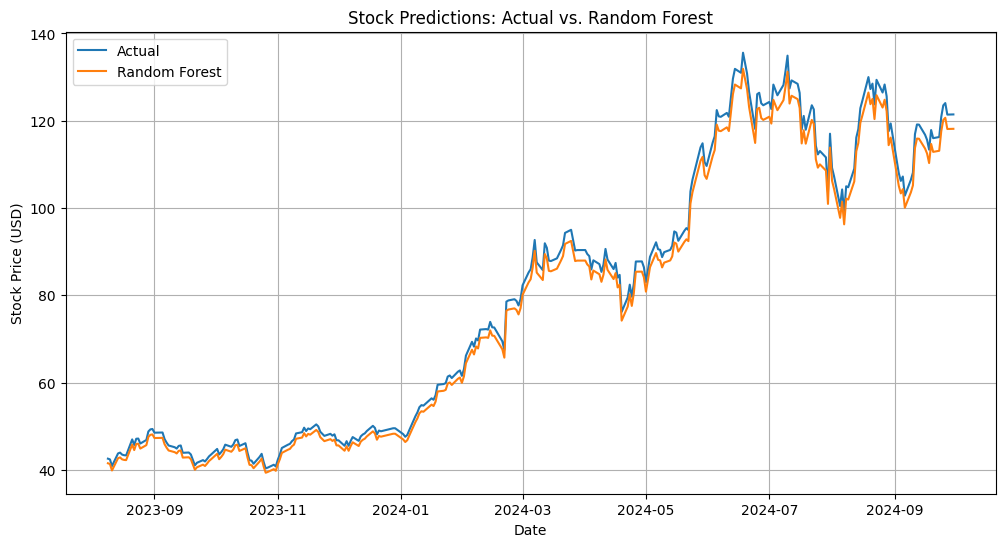

In [40]:
# Select the appropriate date range that aligns with test predictions,
# accounting for the sequence length offset
dates_daily = df_nvidia['Date'][train_size + sequence_length : len(df_nvidia)]

# Create a new plot figure with specified width and height
plt.figure(figsize=(12, 6))

# Plot actual stock prices (ground truth) for the selected dates
plt.plot(dates_daily, y_actual.flatten(), label='Actual')

# Plot stock price predictions made by the Random Forest model
plt.plot(dates_daily, y_actual_rf_inv.flatten(), label='Random Forest')

# Set the plot title
plt.title("Stock Predictions: Actual vs. Random Forest")

# Label the x-axis with 'Date'
plt.xlabel("Date")

# Label the y-axis with 'Stock Price (USD)'
plt.ylabel("Stock Price (USD)")

# Display a legend, enable grid for better visual guidance, Save the plot as a PNG file, Display the plot
plt.legend()
plt.grid(True)
plt.savefig('nvidia-random-forest-predication.png')
plt.show()

In [41]:
# Import auto_arima from pmdarima to automatically find the best (p,d,q) parameters
from pmdarima import auto_arima

# Define the training size as 80% of the dataset
train_size = int(len(df_nvidia) * 0.8)

# Split the data into training and testing sets based on Close prices
train, test = df_nvidia['Close'][:train_size], df_nvidia['Close'][train_size:]

# Use auto_arima to automatically determine the best ARIMA order (p,d,q)
# seasonal=False: for non-seasonal data
# stepwise=True: use stepwise search to reduce computation
# suppress_warnings=True: ignore convergence warnings
auto_model = auto_arima(train, seasonal=False, stepwise=True, trace=False, suppress_warnings=True)

# Extract the best order (p, d, q) from the auto_arima model
best_order = auto_model.order

# Print the selected ARIMA order
print(f"Best ARIMA Order: ({best_order})")

# Initialize and train the ARIMA model using the optimal order
arima_model = ARIMA(train, order=best_order)
fitted_model = arima_model.fit()

# Forecast the next 'len(test)' values to compare with test set
forecast = fitted_model.forecast(steps=len(test))

Best ARIMA Order: ((2, 1, 2))


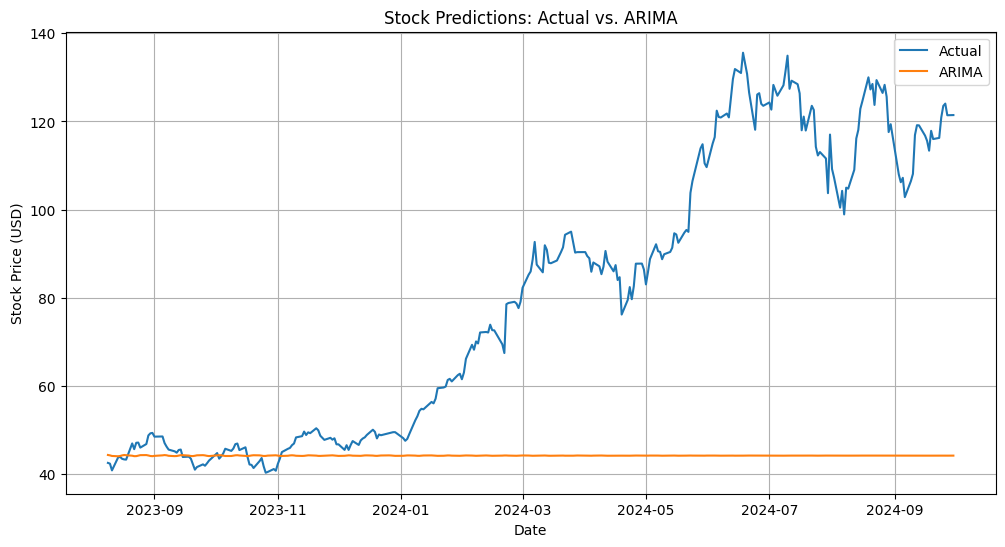

In [42]:
# Extract the corresponding dates for the forecast period
# Ensure alignment with the number of predictions (same as y_actual)
dates_arima = df_nvidia['Date'][-len(y_actual):]

# Create a new figure for plotting with specified size
plt.figure(figsize=(12, 6))

# Plot the actual stock prices (ground truth) over the selected date range
plt.plot(dates_arima, y_actual.flatten(), label='Actual')

# Plot the ARIMA forecast, limited to match the length of actual values
plt.plot(dates_arima, forecast[:len(y_actual)], label='ARIMA')

# Add a title to the plot
plt.title("Stock Predictions: Actual vs. ARIMA")

# Label the x-axis as Date
plt.xlabel("Date")

# Label the y-axis as 'Stock Price (USD)'
plt.ylabel("Stock Price (USD)")

# Display a legend, enable grid for better visual guidance, Save the plot as a PNG file, Display the plot
plt.legend()
plt.grid(True)
plt.savefig('nvidia-arima-stock-predication.png')
plt.show()

In [43]:
# Define a function to evaluate a regression model using common metrics
def evaluate_model(y_true, y_pred, model_name):
    # Calculate Mean Absolute Error (MAE) average of absolute differences between predictions and true values
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate Root Mean Squared Error (RMSE) penalizes larger errors more than MAE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Calculate R² Score (coefficient of determination) measures how well the predictions explain the variance
    r2 = r2_score(y_true, y_pred)

    # Return the model name and all metrics rounded to 4 decimal places
    return model_name, round(mae, 4), round(rmse, 4), round(r2, 4)

+-------------------+---------+---------+------------+
| Model             |     MAE |    RMSE |   R² Score |
+===================+=========+=========+============+
| Linear Regression |  2.6547 |  4.0176 |     0.9823 |
+-------------------+---------+---------+------------+
| Random Forest     | 34.1292 | 45.2188 |    -1.2401 |
+-------------------+---------+---------+------------+
| LSTM Daily        |  5.3195 |  7.2279 |     0.946  |
+-------------------+---------+---------+------------+
| LSTM Weekly       |  7.8195 | 10.7969 |     0.8816 |
+-------------------+---------+---------+------------+
| ARIMA             | 34.4113 | 46.1709 |    -1.1905 |
+-------------------+---------+---------+------------+


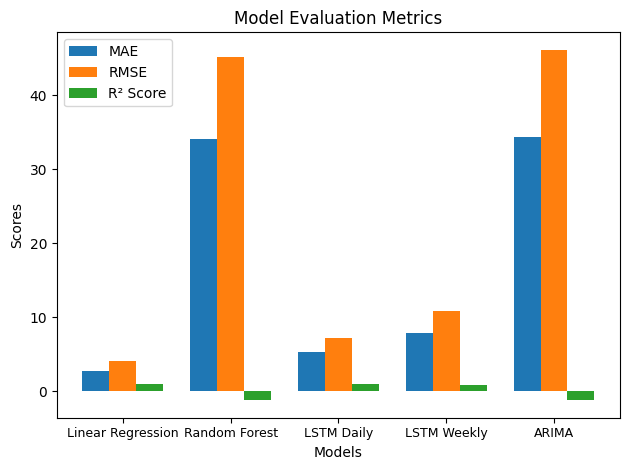

In [44]:
from tabulate import tabulate

# Run evaluation on all models and collect results into a list
results = [
    evaluate_model(np.array(y_actual_lr_inv).flatten(), np.array(y_pred_lr_inv).flatten(), "Linear Regression"),
    evaluate_model(np.array(y_actual_rf_inv).flatten(), np.array(y_pred_rf_inv).flatten(), "Random Forest"),
    evaluate_model(np.array(y_actual).flatten(), np.array(y_pred).flatten(), "LSTM Daily"),
    evaluate_model(np.array(y_week_actual).flatten(), np.array(y_week_pred).flatten(), "LSTM Weekly"),
    evaluate_model(np.array(test).flatten(), np.array(forecast).flatten(), "ARIMA"),
]

# Define table headers for the tabulated output
headers = ["Model", "MAE", "RMSE", "R² Score"]

# Print the evaluation results in a well-formatted grid table
print(tabulate(results, headers=headers, tablefmt="grid"))

# Unpack results into individual lists for plotting
model_names, mae_values, rmse_values, r2_values = zip(*results)

# Create X-axis positions for bar groups
x = np.arange(len(model_names))
width = 0.25

# Create a bar chart to visualize model performance metrics
fig, ax = plt.subplots()

# Plot MAE values slightly to the left
ax.bar(x - width, mae_values, width, label='MAE')
# Plot RMSE values centered
ax.bar(x, rmse_values, width, label='RMSE')
# Plot R² Score values slightly to the right
ax.bar(x + width, r2_values, width, label='R² Score')

# Set the y-axis label
ax.set_ylabel('Scores')
# Set the chart title
ax.set_title('Model Evaluation Metrics')

# Set the positions and labels for the x-axis ticks
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=9)
ax.set_xlabel('Models')
ax.legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig('nvidia-model-evaluation.png')
plt.show()



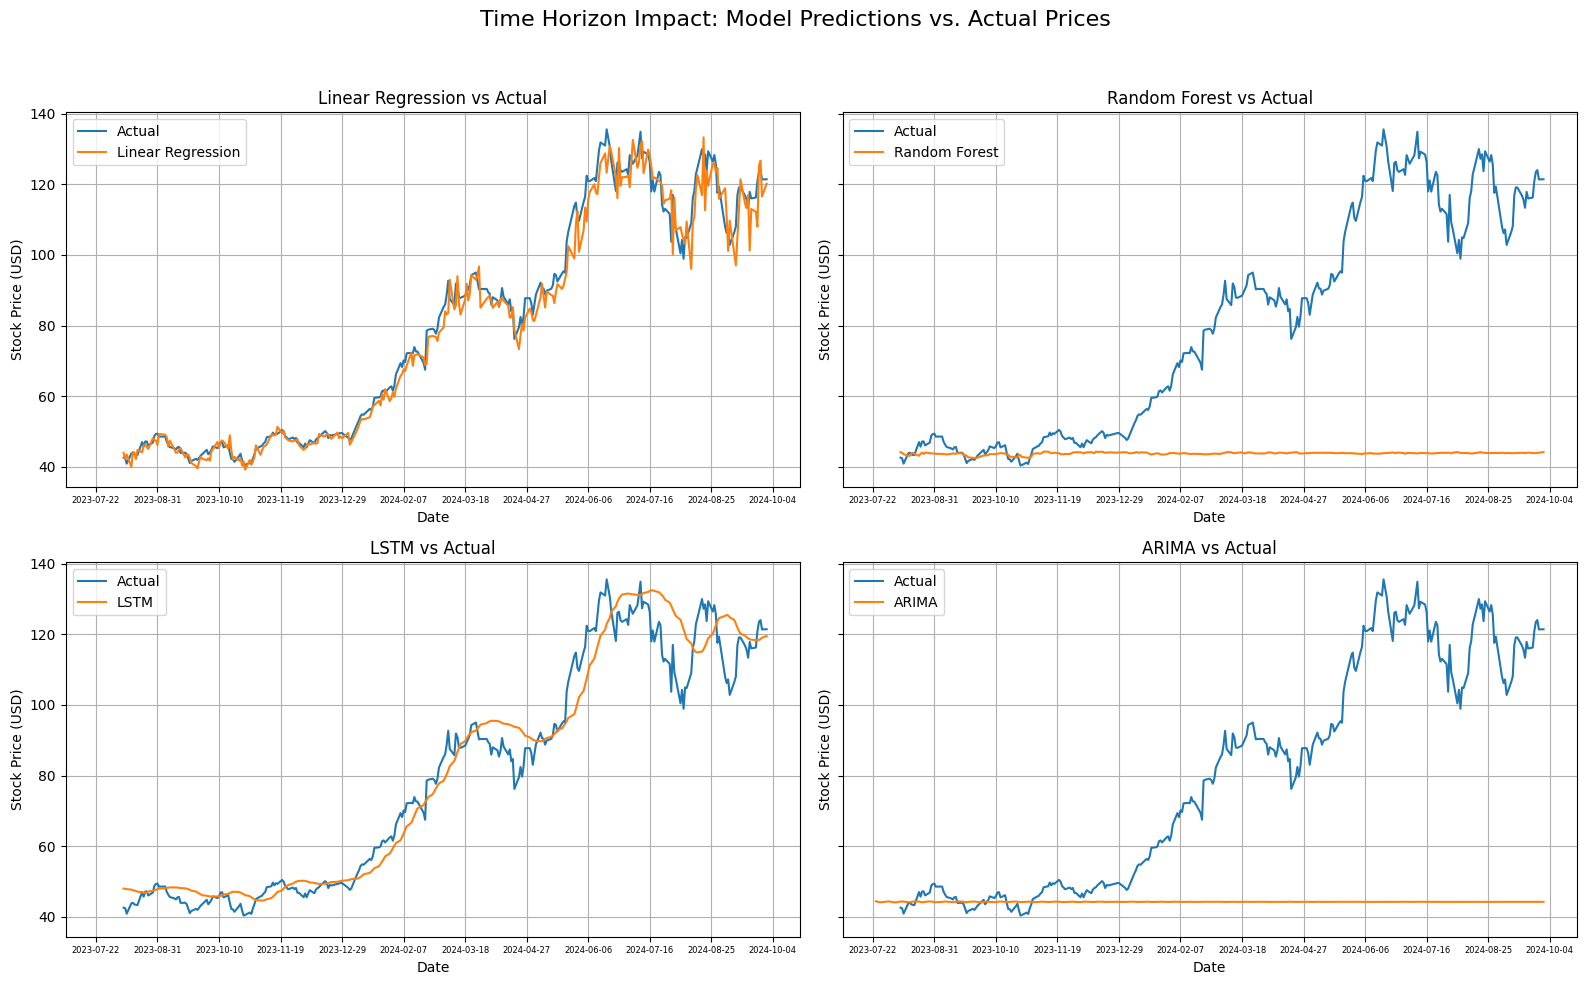

In [45]:
# Convert the 'Date' column to datetime format, if it exists
if 'Date' in df_nvidia.columns:
    df_nvidia['Date'] = pd.to_datetime(df_nvidia['Date'], unit='ns', errors='coerce') # Convert using nanoseconds if needed
    df_nvidia.set_index('Date', inplace=True) # Set 'Date' as the index for time series plotting

# Time Horizon Impact Linear Regression, Random Forests, LSTM, ARIMA
# Create a 2x2 grid of subplots for comparing model predictions
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)

# Plot: Linear Regression vs Actual
axs[0, 0].plot(df_nvidia.index[-len(y_test):], y_actual, label='Actual') # True values
axs[0, 0].plot(df_nvidia.index[-len(y_test):], y_pred_lr_inv, label='Linear Regression') # Predicted values
axs[0, 0].set_title("Linear Regression vs Actual")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot: Random Forest vs Actual
axs[0, 1].plot(df_nvidia.index[-len(y_test):], y_actual, label='Actual')
axs[0, 1].plot(df_nvidia.index[-len(y_test):], y_pred_rf_inv, label='Random Forest')
axs[0, 1].set_title("Random Forest vs Actual")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot: LSTM vs Actual
axs[1, 0].plot(df_nvidia.index[-len(y_test):], y_actual, label='Actual')
axs[1, 0].plot(df_nvidia.index[-len(y_test):], y_pred.flatten(), label='LSTM')
axs[1, 0].set_title("LSTM vs Actual")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot: ARIMA vs Actual
axs[1, 1].plot(df_nvidia.index[-len(y_test):], y_actual, label='Actual')
axs[1, 1].plot(df_nvidia.index[-len(test):], forecast, label='ARIMA') # Use 'test' length for ARIMA predictions
axs[1, 1].set_title("ARIMA vs Actual")
axs[1, 1].legend()
axs[1, 1].grid(True)

# Apply formatting to all subplots
for ax in axs.flat:
    ax.set_xlabel("Date") # Label for x-axis
    ax.set_ylabel("Stock Price (USD)") # Label for y-axis
    ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # Limit number of x-axis ticks
    ax.tick_params(axis='x', labelsize=6)  # Set smaller font for x-axis labels
    ax.tick_params(labelbottom=True) # Ensure bottom labels are shown even if shared

# Add a super title across all subplots
fig.suptitle("Time Horizon Impact: Model Predictions vs. Actual Prices", fontsize=16)
# Adjust layout to prevent overlapping
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Save the entire figure as a PNG image and display image
plt.savefig('nvidia-time-horizon-prediction-comparison.png')
plt.show()